In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [2]:
columns = ['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration', 
          'num-of-doors', 'body-style', 'drive-wheels', 'engine-location', 
          'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type', 
          'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke', 
          'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price']

df = pd.read_csv("imports-85.data", header=None, names=columns)

In [3]:
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [4]:
df = df[['symboling', 'wheel-base', 'length', 'width', 'height', 'curb-weight', 
         'engine-size', 'compression-ratio', 'horsepower', 'city-mpg', 'highway-mpg', 'price']]

In [5]:
df.head()

,symboling,wheel-base,length,width,height,curb-weight,engine-size,compression-ratio,horsepower,city-mpg,highway-mpg,price
0,3,88.6,168.8,64.1,48.8,2548,130,9.0,111,21,27,13495
1,3,88.6,168.8,64.1,48.8,2548,130,9.0,111,21,27,16500
2,1,94.5,171.2,65.5,52.4,2823,152,9.0,154,19,26,16500
3,2,99.8,176.6,66.2,54.3,2337,109,10.0,102,24,30,13950
4,2,99.4,176.6,66.4,54.3,2824,136,8.0,115,18,22,17450


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   wheel-base         205 non-null    float64
 2   length             205 non-null    float64
 3   width              205 non-null    float64
 4   height             205 non-null    float64
 5   curb-weight        205 non-null    int64  
 6   engine-size        205 non-null    int64  
 7   compression-ratio  205 non-null    float64
 8   horsepower         205 non-null    object 
 9   city-mpg           205 non-null    int64  
 10  highway-mpg        205 non-null    int64  
 11  price              205 non-null    object 
dtypes: float64(5), int64(5), object(2)
memory usage: 19.3+ KB


In [7]:
df.replace('?', pd.NA, inplace=True)
df.dropna(inplace=True)
df.apply(pd.to_numeric, errors='coerce')
df = df.astype(int)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 199 entries, 0 to 204
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   symboling          199 non-null    int64
 1   wheel-base         199 non-null    int64
 2   length             199 non-null    int64
 3   width              199 non-null    int64
 4   height             199 non-null    int64
 5   curb-weight        199 non-null    int64
 6   engine-size        199 non-null    int64
 7   compression-ratio  199 non-null    int64
 8   horsepower         199 non-null    int64
 9   city-mpg           199 non-null    int64
 10  highway-mpg        199 non-null    int64
 11  price              199 non-null    int64
dtypes: int64(12)
memory usage: 20.2 KB


In [9]:
target = 'price'
X = df.drop(target, axis=1)
y = df[target]

In [10]:
X.shape

(199, 11)

In [11]:
y.shape

(199,)

In [12]:
for i in range(100):
    x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.1)
    model = LinearRegression()
    model.fit(x_train, y_train)
    score = model.score(x_test, y_test)
    if score>0.9:
        print(score)
        break
else:
    print("Sorry we could not get that accuracy")

0.9310257350870316


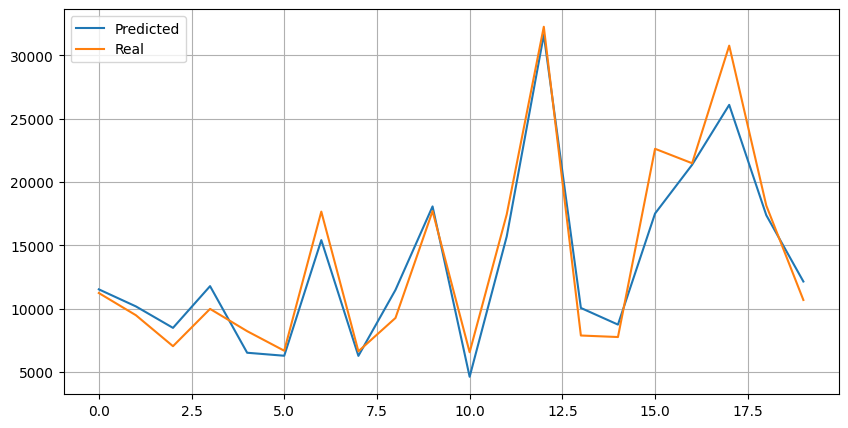

In [13]:
predictions = model.predict(x_test)
yt = y_test.reset_index(drop=True)
# print(predictions)
# print(yt)
plt.figure(figsize=(10,5))
plt.plot(predictions, label='Predicted')
plt.plot(yt, label='Real')
plt.legend()
plt.grid()
plt.show()